# Kaggle Challenge: House Prices - Advanced Regression Techniques

* Author: Eric Caldwell

* Presentation Type: Technical

# Data Summary

* The data contains home information from houses on the market in Ames, Iowa with the goal of predicting the sale price of each home.
* The data has 1460 rows and 81 columns.
* Each row is a home.
* From the columns, 79 are explanatory variables, 1 is an ID, and 1 is the sale price.

# Goals:
* Use various plotting methods to find important features
* Create models with an RMSE score of <40,000 and an R2 score of >0.70

# Methods:
* Plotting (Seaborn/Matplotlib)
  - ECDF Plot
  - Histplot
  - Violinplot
  - KDE Plot
* Regression Modeling
    - Linear 
    - Lasso 
    - Bayesian Ridge
    - Kernel Ridge

# Actionable Takeaway: 
* __2+ story houses have more maximum selling potential than others.__
* Ames, Iowa is a financially resilient area that was largely unaffected by the 2008 housing market crash.

# Data Dictionary: 

In [372]:
# Path to Data Dictionary Text File

txt = r"/Users/eric_caldwell/Library/CloudStorage/OneDrive-UniversityofMountUnion/4th Year/" +\
"DSC 440/house-prices-advanced-regression-techniques/data_description.txt"

# Open the txt file
f = open(txt, 'r')

# Read the text file
data_dict = f.read()

# Print out the contents of the text file
print(data_dict)

# Close the file
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [373]:
# Import Cell

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import pandas as pd
import numpy as np

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Data Exploration

In [374]:
# Read in the Data

path = r"/Users/eric_caldwell/Library/CloudStorage/OneDrive-UniversityofMountUnion/"+ \
"4th Year/DSC 440/house-prices-advanced-regression-techniques/train.csv"

df = pd.read_csv(path)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [375]:
# Find the shape of the data
print(df.shape)
print("The data has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

(1460, 81)
The data has 1460 rows and 81 columns


In [376]:
# Get some more info on the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [377]:
# What types of buildings are in this dataset? Let's find out!
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


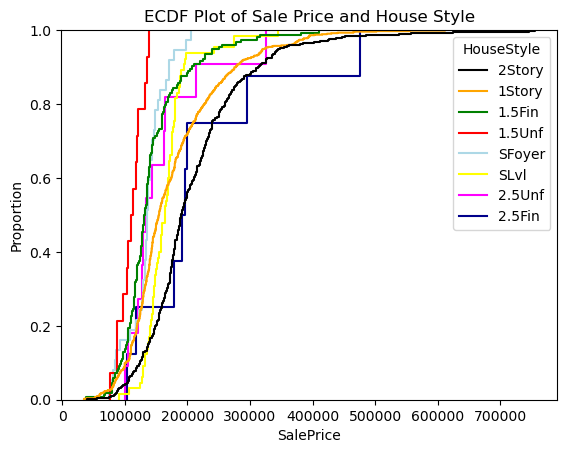

In [378]:
# How influential is the house style on the sale price? Let's use an ecdfplot to find out.
plt.figure()
sns.ecdfplot(data=df, x="SalePrice", hue="HouseStyle",
            palette=['black', 'orange', 'green', 'red', 'lightblue', 'yellow', 'magenta', 'darkblue'])
plt.title("ECDF Plot of Sale Price and House Style")
plt.show()

/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


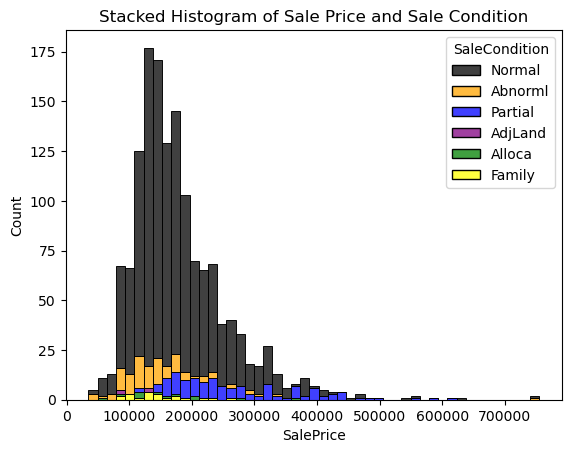

In [379]:
# How do Sale Conditions and and Sale Price Compare? Let's use a histplot to find out.
plt.figure()
sns.histplot(data=df, x="SalePrice", hue="SaleCondition", multiple="stack",
             palette=['black', 'orange', 'blue', 'purple', 'green', 'yellow'])
plt.title("Stacked Histogram of Sale Price and Sale Condition")
plt.show()

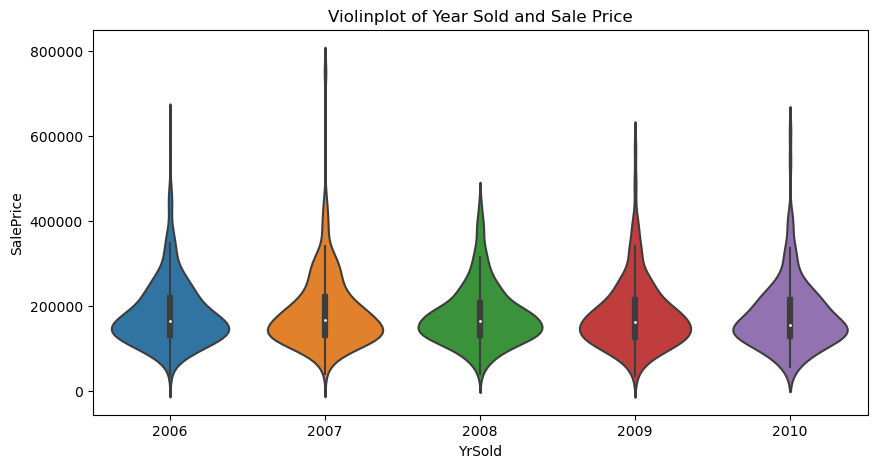

In [380]:
# Did the housing market trouble in 2008 effect home prices? Let's investigate with a violinplot.
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="YrSold", y="SalePrice", linecolor="k")
plt.title("Violinplot of Year Sold and Sale Price")
plt.show()

# Preprocessing for Regression

### Columns with object data types must be reformatted

In [381]:
le=LabelEncoder()

# Looping through and changing object data types (strings) into number formats to be correctly formatted for ML.
for i in df.columns:
    if (df[i].dtype)=='object':
        df[i]=le.fit_transform(df[i])
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice          int64
Length: 81, dtype: object


In [382]:
# Get rid of NaNs and fill in with the median
for i in df:
    df[i] = df[i].fillna(df[i].median())

In [383]:
# Is the data clean?
for i in df:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [384]:
# Pick some important features out of the df and correlate them

sub_df = df[['MoSold', 'YrSold', 'SaleCondition', 'SalePrice', 'LotArea', 'Neighborhood', 'OverallQual', 'HouseStyle', 'BldgType']]

corr = sub_df.corr()

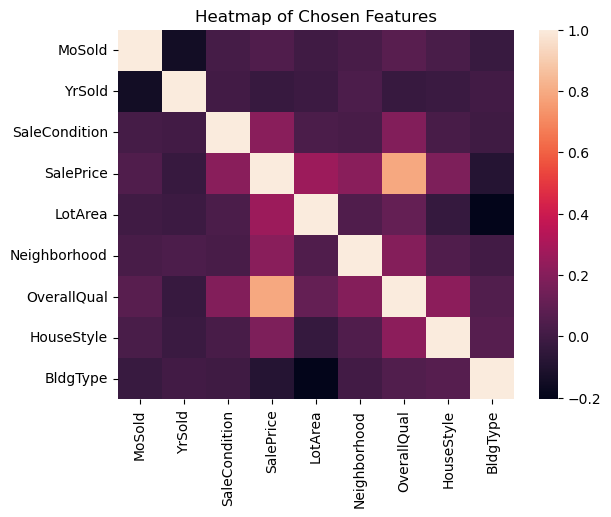

In [385]:
# Plot the correlation heatmap
plt.figure()
sns.heatmap(corr)
plt.title("Heatmap of Chosen Features")
plt.show()

## Quality and Sale Price are highly correlated, let's investigate further!

/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


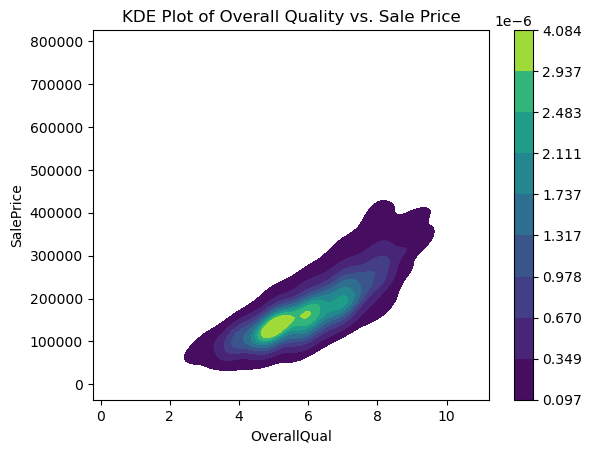

In [386]:
# Plotting a 2D kdeplot for overall quality and sale price.
plt.figure()
sns.kdeplot(data=df, x="OverallQual", y="SalePrice", fill=True, cmap='viridis', cbar=True)
plt.title("KDE Plot of Overall Quality vs. Sale Price")
plt.show()

### Split the Data

In [387]:
# Splitting the data for regression.
X = df.drop(columns = ["Id", "SalePrice"])
y = df["SalePrice"]

### Perform the Training/Testing Split

In [388]:
# Splitting the data into 80% training and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Base Linear Regression

In [389]:
# Call the Regressor
lin_reg = LinearRegression()
# Fit and predict
lin_reg.fit(X_train, y_train)
y_pred_linreg = lin_reg.predict(X_test)

In [390]:
# Print the results
print("MSE:", mean_squared_error(y_pred_linreg, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_linreg, y_test)))
print("R2:", r2_score(y_pred_linreg, y_test))

MSE: 1472416292.3820143
RMSE: 38372.07698811747
R2: 0.7444747355929306


# Lasso Regression

In [391]:
# Call the Regressor
lasso = Lasso()
# Fit and predict
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [392]:
# Print the Results
print("MSE:", mean_squared_error(y_pred_lasso, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_lasso, y_test)))
print("R2:", r2_score(y_pred_lasso, y_test))

MSE: 1473099055.3034854
RMSE: 38380.972568493955
R2: 0.7442945861372141


# Bayesian Ridge Regression

In [393]:
# Call the classifier
br = BayesianRidge()
# Fit and predict
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)

In [394]:
# Print the results
print("MSE:", mean_squared_error(y_pred_br, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_br, y_test)))
print("R2:", r2_score(y_pred_br, y_test))
print("ALPHA:", br.alpha_)

MSE: 1442713399.2263439
RMSE: 37983.06726985518
R2: 0.7435750585748251
ALPHA: 1.084023538376734e-09


# Kernel Ridge Regression

In [395]:
# Call the classifier
kr = KernelRidge()
# Fit and predict
kr.fit(X_train, y_train)
y_pred_kr = kr.predict(X_test)

In [396]:
# Print the results
print("MSE:", mean_squared_error(y_pred_kr, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_kr, y_test)))
print("R2:", r2_score(y_pred_kr, y_test))

MSE: 1474592173.2334535
RMSE: 38400.41892002551
R2: 0.744269286664712


## Good Results, but they are highly dependent on the training/testing split. We need something more robust.

# Enter Cross Validation

In [397]:
# Perform cross validation on all regressors with two different error metrics and 10 cross validations.

lr_rmse = cross_val_score(lin_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
lr_r2 = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=5)

lasso_rmse = cross_val_score(lasso, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
lasso_r2 = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)

br_rmse = cross_val_score(br, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
br_r2 = cross_val_score(br, X_train, y_train, scoring='r2', cv=5)

kr_rmse = cross_val_score(kr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
kr_r2 = cross_val_score(kr, X_train, y_train, scoring='r2', cv=5)

/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.454e+10, tolerance: 6.156e+08
  model = cd_fast.enet_coordinate_descent(
/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+10, tolerance: 5.836e+08
  model = cd_fast.enet_coordinate_descent(
/Users/eric_caldwell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

In [398]:
# Print the mean of the various regressors and error metrics

print("LR RMSE:",lr_rmse.mean())
print("LR R2:",lr_r2.mean())
print("\n")

print("LASSO RMSE:",lasso_rmse.mean())
print("LASSO R2:",lasso_r2.mean())
print("\n")

print("BAYESIAN RIDGE RMSE:",br_rmse.mean())
print("BAYESIAN RIDGE R2:",br_r2.mean())
print("\n")

print("KERNEL RIDGE RMSE:",kr_rmse.mean())
print("KERNEL RIDGE R2:",kr_r2.mean())

LR RMSE: -34703.77996380425
LR R2: 0.7982794490206032


LASSO RMSE: -34695.20572546418
LASSO R2: 0.7983808093762261


BAYESIAN RIDGE RMSE: -33995.85315777454
BAYESIAN RIDGE R2: 0.8057346709837336


KERNEL RIDGE RMSE: -34501.71667015167
KERNEL RIDGE R2: 0.800622597339666


# Results/Conclusions:
* __Bayesian Ridge Regression__ produced the best model.
* __Cross Validation__ prevents bad data splits from misrepresenting the accuracy of a model.
* Selling Points tend to rise with __newer homes, higher quality homes, and taller homes.__ 